# Task 4.9, Part 1

## Import Data and Libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path to folder
path = r'/Users/caitlin/Documents/Instacart Basket Analysis 12.2021'

In [4]:
# Check path
path

'/Users/caitlin/Documents/Instacart Basket Analysis 12.2021'

In [5]:
# Import data file
df_customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

## Data Wrangling

In [6]:
# Check columns
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


The surnam, First Name, STATE columns are inconsistent with the rest of the df, and others are unclear so re-naming. All seem relevant, so I am not deleting any.

In [7]:
# Rename First Name column
df_customers.rename(columns = {'First Name' : 'customer_first_name'}, inplace = True)

In [8]:
# Rename Surname column
df_customers.rename(columns = {'Surnam' : 'customer_surname'}, inplace = True)

In [9]:
# Rename gender column
df_customers.rename(columns = {'Gender' : 'customer_gender'}, inplace = True)

In [10]:
# Rename state column
df_customers.rename(columns = {'STATE' : 'customer_state'}, inplace = True)

In [11]:
# Rename family status column
df_customers.rename(columns = {'fam_status' : 'customer_family_status'}, inplace = True)

In [12]:
# Rename number of dependents column
df_customers.rename(columns = {'n_dependants' : 'customer_number_dependents'}, inplace = True)

In [13]:
# Rename income column
df_customers.rename(columns = {'income' : 'customer_income'}, inplace = True)

In [14]:
# Rename age column
df_customers.rename(columns = {'Age' : 'customer_age'}, inplace = True)

In [15]:
# Rename date joinedcolumn
df_customers.rename(columns = {'date_joined' : 'date_customer_joined'}, inplace = True)

In [16]:
# Check new column names
df_customers.head()

,user_id,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


# Quality Checks

In [17]:
# Check shapte of df
df_customers.shape

(206209, 10)

## Check for Null Values

In [18]:
#Check for null values
df_customers.isnull().sum()

user_id                           0
customer_first_name           11259
customer_surname                  0
customer_gender                   0
customer_state                    0
customer_age                      0
date_customer_joined              0
customer_number_dependents        0
customer_family_status            0
customer_income                   0
dtype: int64

In [19]:
df_nan = df_customers[df_customers['customer_first_name'].isnull() == True]

In [20]:
df_nan[:100]

,user_id,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income
53,76659,NaN,Gilbert,Male,Colorado,26,1/1/2017,2,married,41709
73,13738,NaN,Frost,Female,Louisiana,39,1/1/2017,0,single,82518
82,89996,NaN,Dawson,Female,Oregon,52,1/1/2017,3,married,117099
99,96166,NaN,Oconnor,Male,Oklahoma,51,1/1/2017,1,married,155673
105,29778,NaN,Dawson,Female,Utah,63,1/1/2017,3,married,151819
...,...,...,...,...,...,...,...,...,...,...
1914,847,NaN,Parks,Male,Oklahoma,51,1/12/2017,3,married,112873
1931,56890,NaN,Koch,Male,New Jersey,52,1/12/2017,3,married,115501
1970,15323,NaN,Oconnor,Male,Nevada,54,1/12/2017,1,married,34398
1986,120673,NaN,Koch,Male,Connecticut,65,1/12/2017,0,divorced/widowed,34356


The null values for first name above are 5% of the total number of records. It does not impact the analysis because Instacart can use last names or not use names at all.

In [21]:
# Check for mixed data 
for col in df_customers.columns.tolist():
  weird = (df_customers[[col]].applymap(type) != df_customers[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_customers[weird]) > 0:
    print (col)

customer_first_name


The only column that is mixed is the first name column and that is names so it shouldn't be mixed. I will change it to string.

In [22]:
# Change mixed data column of customer first name to string
df_customers['customer_first_name'] = df_customers['customer_first_name'].astype('str')

In [23]:
# Check statistics 
df_customers.describe()

,user_id,customer_age,customer_number_dependents,customer_income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


The values mean, min, and max all appear logical so there do not appear to be outliers.

## Find Duplicates

In [24]:
# Find duplicates
df_dups = df_customers[df_customers.duplicated()]

In [25]:
df_dups

,user_id,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income


There do not appear to be any duplicates.

# Combine Customer Data with Prepared Dataset

In [29]:
# Download other data set
ords_prods_grouped = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_grouped.pkl'))

In [30]:
# Show all columns
pd.options.display.max_columns = None

In [31]:
# Check headers for master dataset
ords_prods_grouped.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency
0,0,2539329,1,prior,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
1,1,2398795,1,prior,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
2,2,473747,1,prior,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
3,3,2254736,1,prior,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
4,4,431534,1,prior,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer


First, I need to clean up the columns a bit. Next - the datasets will need to be merged on the one shared variable - user_id. I will first check to make sure the columns are the same datatype.

In [32]:
# Drop unnecessary columns
ords_prods_grouped = ords_prods_grouped.drop(columns = ['Unnamed: 0'],)

In [33]:
ords_prods_grouped = ords_prods_grouped.drop(columns = ['_merge'],)

In [34]:
ords_prods_grouped = ords_prods_grouped.drop(columns = ['eval_set'],)

In [35]:
# Check dropped columns
ords_prods_grouped.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer


In [36]:
# Check data types of customer df
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   user_id                     206209 non-null  int64 
 1   customer_first_name         206209 non-null  object
 2   customer_surname            206209 non-null  object
 3   customer_gender             206209 non-null  object
 4   customer_state              206209 non-null  object
 5   customer_age                206209 non-null  int64 
 6   date_customer_joined        206209 non-null  object
 7   customer_number_dependents  206209 non-null  int64 
 8   customer_family_status      206209 non-null  object
 9   customer_income             206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [37]:
# Check data types of main df
ords_prods_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   order_id                 int64  
 1   user_id                  int64  
 2   order_number             int64  
 3   orders_day_of_week       int64  
 4   order_hour_of_day        int64  
 5   days_since_prior_order   float64
 6   single_order             bool   
 7   product_id               int64  
 8   add_to_cart_order        int64  
 9   reordered                int64  
 10  product_name             object 
 11  aisle_id                 int64  
 12  department_id            int64  
 13  prices                   float64
 14  price_range_loc          object 
 15  busiest_day              object 
 16  busiest_days             object 
 17  busiest_period_of_day    object 
 18  max_order                int64  
 19  loyalty_flag             object 
 20  order_avg                float64
 21  spende

Both order_id columns are the same data type so the datasets can be merged on that variable.

In [38]:
# Check shape of dataframes
ords_prods_grouped.shape

(32404859, 24)

In [39]:
df_customers.shape

(206209, 10)

The customer dataframe is significantly smaller.

When I attempted to merge the datasets as they are above, it took too much memory and my computer was not able to do it, so I will need to reduce the size. The main DF memory usage is very high, so I will need to reduce it.

In [40]:
# Check statistics to ensure analysis is not impacted later and which columns may be dropped
ords_prods_grouped.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,order_avg,median_days_prior_order
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,1.198023e+01,3.305217e+01,1.198023e+01,1.039776e+01
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.956554e+02,2.515525e+01,8.324227e+01,7.131754e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01


In [41]:
# Check mean, median, max
ords_prods_grouped['prices'].mean()

11.980225638467232

In [42]:
ords_prods_grouped['prices'].median()

7.4

In [43]:
ords_prods_grouped['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

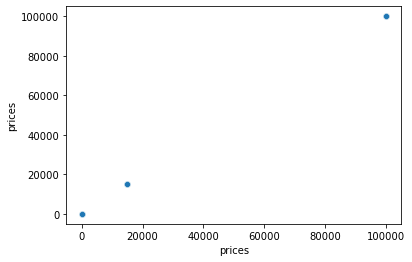

In [44]:
# Create scatterplot for exploratory analysis of max values that are much higher than the mean and median
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_grouped)

In [45]:
# Show all columns
pd.options.display.max_columns = None

In [46]:
# Check outlier values
ords_prods_grouped.loc[ords_prods_grouped['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency
10030345,912404,17,12,2,14,5.0,False,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Busiest Times,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Busiest Times,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Moderate Times,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest day,Busiest days,Busiest Times,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Busiest Times,16,Regular Customer,114.426619,High Spender,23.0,Non-Frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Busiest day,Busiest days,Busiest Times,39,Regular Customer,1106.743956,High Spender,4.0,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Busiest day,Busiest days,Busiest Times,39,Regular Customer,1106.743956,High Spender,4.0,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Slowest days,Busiest Times,15,Regular Customer,451.153540,High Spender,5.0,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Slowest days,Moderate Times,12,Regular Customer,1178.381871,High Spender,12.0,Regular Customer


In [47]:
# Create DF of outliers
df_outliers = ords_prods_grouped.loc[ords_prods_grouped['prices'] > 100]

In [48]:
# Value counts of outliers
df_outliers['prices'].value_counts(dropna = False)

14900.0    4429
99999.0     698
Name: prices, dtype: int64

In [49]:
df_outliers['product_name'].value_counts(dropna = False)

Lowfat 2% Milkfat Cottage Cheese    4429
2 % Reduced Fat  Milk                698
Name: product_name, dtype: int64

The outliers are a very small percentage and they will interfere with the analysis. At the advice of my tutor (feedback from the previous task), I will delete these values. They also do not make sense - cottage cheese and milk are not normally that expensive.

In [50]:
# Check shape of ords_prods DF and outliers
ords_prods_grouped.shape

(32404859, 24)

In [51]:
df_outliers.shape

(5127, 24)

In [52]:
# Drop outlier values - create new dataframe wihtout those values
ords_prods_new = ords_prods_grouped.loc[ords_prods_grouped['prices'] < 100]

In [53]:
# Check shape afer dropping outliers
ords_prods_new.shape

(32399732, 24)

In [54]:
# Check max of new df
ords_prods_new['prices'].max()

25.0

The shape of the new dataframe and statistical values illustrate the values have been removed.

In [55]:
# Re calculate order average column because it is dependent on prices column
ords_prods_new['order_avg'] = ords_prods_new.groupby(['user_id'])['prices'].transform(np.mean)

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/2325666441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new['order_avg'] = ords_prods_new.groupby(['user_id'])['prices'].transform(np.mean)


In [56]:
# Drop reordered column because it is not needed for the analysis
ords_prods_new = ords_prods_new.drop(columns = ['reordered'],)

In [57]:
# Check if column dropped
ords_prods_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency
0,2539329,1,1,2,8,NaN,True,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
1,2398795,1,2,3,7,15.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
2,473747,1,3,3,12,21.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
3,2254736,1,4,4,7,29.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer
4,431534,1,5,4,15,28.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer


In [58]:
# Checking for nulls
ords_prods_new.isnull().sum()

order_id                         0
user_id                          0
order_number                     0
orders_day_of_week               0
order_hour_of_day                0
days_since_prior_order     2075745
single_order                     0
product_id                       0
add_to_cart_order                0
product_name                     0
aisle_id                         0
department_id                    0
prices                           0
price_range_loc                  0
busiest_day                      0
busiest_days                     0
busiest_period_of_day            0
max_order                        0
loyalty_flag                     0
order_avg                        0
spender_type                     0
median_days_prior_order          5
customer_frequency               5
dtype: int64

I addressed the days since prior order nulls in a previous exercise - they should not be dropped beucase they are all orders from new custuomers. I will check the median order nulls, however.

In [59]:
# Check nulls on median order column
ords_prods_new[ords_prods_new['median_days_prior_order'].isnull() == True]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency
13645692,895835,159838,1,0,17,NaN,True,10749,3,Organic Red Bell Pepper,83,4,5.7,Mid-range product,Busiest day,Busiest days,Busiest Times,1,New Customer,7.42,Low Spender,NaN,NaN
17251990,895835,159838,1,0,17,NaN,True,33401,6,Goat Cheese Crumbles,21,16,14.8,Mid-range product,Busiest day,Busiest days,Busiest Times,1,New Customer,7.42,Low Spender,NaN,NaN
17622767,895835,159838,1,0,17,NaN,True,23695,2,California Veggie Burger,42,1,4.7,Low-range product,Busiest day,Busiest days,Busiest Times,1,New Customer,7.42,Low Spender,NaN,NaN
24138593,895835,159838,1,0,17,NaN,True,21334,5,Organic Peeled Garlic,123,4,10.2,Mid-range product,Busiest day,Busiest days,Busiest Times,1,New Customer,7.42,Low Spender,NaN,NaN
25880002,895835,159838,1,0,17,NaN,True,22198,1,4X Ultra Concentrated Natural Laundry Detergen...,75,17,1.7,Low-range product,Busiest day,Busiest days,Busiest Times,1,New Customer,7.42,Low Spender,NaN,NaN


It is from the same order, so it must have been an error. I will delete them since it is very small number.

In [60]:
# Drop nulls from median days column
ords_prods_new_2 = ords_prods_new[ords_prods_new['median_days_prior_order'].isnull() == False]

In [61]:
# Check shape afer dropping nulls
ords_prods_new_2.shape

(32399727, 23)

In [62]:
# Checking for nulls
ords_prods_new_2.isnull().sum()

order_id                         0
user_id                          0
order_number                     0
orders_day_of_week               0
order_hour_of_day                0
days_since_prior_order     2075740
single_order                     0
product_id                       0
add_to_cart_order                0
product_name                     0
aisle_id                         0
department_id                    0
prices                           0
price_range_loc                  0
busiest_day                      0
busiest_days                     0
busiest_period_of_day            0
max_order                        0
loyalty_flag                     0
order_avg                        0
spender_type                     0
median_days_prior_order          0
customer_frequency               0
dtype: int64

Checking the shape and nulls shows only the values have been deleted.

In [63]:
# Check memory needed to run df
ords_prods_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399727 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   order_id                 int64  
 1   user_id                  int64  
 2   order_number             int64  
 3   orders_day_of_week       int64  
 4   order_hour_of_day        int64  
 5   days_since_prior_order   float64
 6   single_order             bool   
 7   product_id               int64  
 8   add_to_cart_order        int64  
 9   product_name             object 
 10  aisle_id                 int64  
 11  department_id            int64  
 12  prices                   float64
 13  price_range_loc          object 
 14  busiest_day              object 
 15  busiest_days             object 
 16  busiest_period_of_day    object 
 17  max_order                int64  
 18  loyalty_flag             object 
 19  order_avg                float64
 20  spender_type             object 
 21  median

It is still using a great deal of memory - actually the same amount. I am going to optimize the size of some of my columns because they are running a lot of memory. All the columns that account for the busiest time of day, loyalty, price, and spender type are currently objects. Since there are no more than 3 values in each column, I am going to change them to the category datatype.

In [64]:
# Change columns with 3 or fewer value to category to reduce memory usage
ords_prods_new_2['busiest_day'] = ords_prods_new_2['busiest_day'].astype('category')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/2224279958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['busiest_day'] = ords_prods_new_2['busiest_day'].astype('category')


In [65]:
ords_prods_new_2['busiest_days'] = ords_prods_new_2['busiest_days'].astype('category')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/3958669301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['busiest_days'] = ords_prods_new_2['busiest_days'].astype('category')


In [66]:
ords_prods_new_2['busiest_period_of_day'] = ords_prods_new_2['busiest_period_of_day'].astype('category')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/638197058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['busiest_period_of_day'] = ords_prods_new_2['busiest_period_of_day'].astype('category')


In [67]:
ords_prods_new_2['loyalty_flag'] = ords_prods_new_2['loyalty_flag'].astype('category')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/556834275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['loyalty_flag'] = ords_prods_new_2['loyalty_flag'].astype('category')


In [68]:
ords_prods_new_2['spender_type'] = ords_prods_new_2['spender_type'].astype('category')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/729759596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['spender_type'] = ords_prods_new_2['spender_type'].astype('category')


In [69]:
ords_prods_new_2['customer_frequency'] = ords_prods_new_2['customer_frequency'].astype('category')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/3270517521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['customer_frequency'] = ords_prods_new_2['customer_frequency'].astype('category')


In [70]:
ords_prods_new_2['price_range_loc'] = ords_prods_new_2['price_range_loc'].astype('category')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/1281259763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['price_range_loc'] = ords_prods_new_2['price_range_loc'].astype('category')


In [71]:
ords_prods_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399727 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   user_id                  int64   
 2   order_number             int64   
 3   orders_day_of_week       int64   
 4   order_hour_of_day        int64   
 5   days_since_prior_order   float64 
 6   single_order             bool    
 7   product_id               int64   
 8   add_to_cart_order        int64   
 9   product_name             object  
 10  aisle_id                 int64   
 11  department_id            int64   
 12  prices                   float64 
 13  price_range_loc          category
 14  busiest_day              category
 15  busiest_days             category
 16  busiest_period_of_day    category
 17  max_order                int64   
 18  loyalty_flag             category
 19  order_avg                float64 
 20  spender_type          

These changes saved 1.5 GB of memory. So that is a good start. I am going to change some of the int64 types as well - those columns with short ranges of numbers, such as day of week and hour of day into int8 and those with larger ranges to int16. The describe function above will act as my guide

In [72]:
# Change int values to lower int values to save memory
ords_prods_new_2['orders_day_of_week'] = ords_prods_new_2['orders_day_of_week'].astype('int8')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/3847506190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['orders_day_of_week'] = ords_prods_new_2['orders_day_of_week'].astype('int8')


In [73]:
ords_prods_new_2['order_hour_of_day'] = ords_prods_new_2['order_hour_of_day'].astype('int8')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/2523923650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['order_hour_of_day'] = ords_prods_new_2['order_hour_of_day'].astype('int8')


In [74]:
ords_prods_new_2['aisle_id'] = ords_prods_new_2['aisle_id'].astype('int16')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/3944771532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['aisle_id'] = ords_prods_new_2['aisle_id'].astype('int16')


In [75]:
ords_prods_new_2['add_to_cart_order'] = ords_prods_new_2['add_to_cart_order'].astype('int16')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/835628772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['add_to_cart_order'] = ords_prods_new_2['add_to_cart_order'].astype('int16')


In [76]:
ords_prods_new_2['product_id'] = ords_prods_new_2['product_id'].astype('int32')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/3615292820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['product_id'] = ords_prods_new_2['product_id'].astype('int32')


In [77]:
ords_prods_new_2['department_id'] = ords_prods_new_2['department_id'].astype('int8')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/2241154846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['department_id'] = ords_prods_new_2['department_id'].astype('int8')


In [78]:
ords_prods_new_2['max_order'] = ords_prods_new_2['max_order'].astype('int16')

/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_5774/2490201400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_new_2['max_order'] = ords_prods_new_2['max_order'].astype('int16')


In [79]:
ords_prods_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32399727 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   user_id                  int64   
 2   order_number             int64   
 3   orders_day_of_week       int8    
 4   order_hour_of_day        int8    
 5   days_since_prior_order   float64 
 6   single_order             bool    
 7   product_id               int32   
 8   add_to_cart_order        int16   
 9   product_name             object  
 10  aisle_id                 int16   
 11  department_id            int8    
 12  prices                   float64 
 13  price_range_loc          category
 14  busiest_day              category
 15  busiest_days             category
 16  busiest_period_of_day    category
 17  max_order                int16   
 18  loyalty_flag             category
 19  order_avg                float64 
 20  spender_type          

The above changes reduced the dataset from 5.6 to 2.8 GB.

In [80]:
# Merge data sets
df_master = ords_prods_new_2.merge(df_customers, on = 'user_id', indicator = True)

It worked! The merge was successful, but I will run checks to make sure.

In [81]:
# Check headers of new df
df_master.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,single_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,order_avg,spender_type,median_days_prior_order,customer_frequency,customer_first_name,customer_surname,customer_gender,customer_state,customer_age,date_customer_joined,customer_number_dependents,customer_family_status,customer_income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Moderate Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Busiest Times,10,New Customer,6.367797,Low Spender,20.5,Non-Frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [82]:
# Export dataframe
df_master.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'master_df.pkl'))